In [69]:
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [42]:
reviews = pd.read_csv('C:\\Users\\eeron\\Python\\all_critic_reviews_2019.csv', encoding = "ISO-8859-1")
reviews['category'] = [2 if s> 60 else 1 if s<=60 and s>=40 else 0 for s in reviews.score]
reviews.head() #>60 is good, 60-40, <40 

,artist,album,reviewer,score,review,category
0,Nick Cave & the Bad Seeds,Ghosteen,Record Collector,100,It can only tower when it comes to naming this...,2
1,Nick Cave & the Bad Seeds,Ghosteen,Mojo,100,"It still vibrates with Warren Ellis's ominous,...",2
2,Nick Cave & the Bad Seeds,Ghosteen,The A.V. Club,100,He sounds simultaneously alone at the edge of ...,2
3,Nick Cave & the Bad Seeds,Ghosteen,musicOMH.com,100,"Yes, it can be painful, but theres a beautifu...",2
4,Nick Cave & the Bad Seeds,Ghosteen,Classic Rock Magazine,100,Ghosteen is an album which raises the bar in t...,2


In [35]:
cvect = CountVectorizer(max_features = 1000, stop_words = ENGLISH_STOP_WORDS)
cvect.fit(reviews.review)
X_bow = cvect.transform(reviews.review)

In [36]:
X_bow_df = pd.DataFrame(X_bow.toarray(), columns = vect.get_feature_names())
X_bow_df.head()

,10,106,108,11,110,111,112,113,114,115,...,worth,worthy,writing,written,wrong,year,years,yes,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_bow_df.sum().nlargest(10) #we can consider adding some of these generic words to our stopword using ENGLISH_STOP_WORDS.union([list of words])

album     1723
2019      1149
like       927
record     723
songs      684
music      565
band       493
sound      481
new        464
pop        444
dtype: int64

In [45]:
y = reviews.category
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bow_df, y, test_size = 0.2, random_state = 7)

In [57]:
bow_lr = LogisticRegression().fit(Xb_train, yb_train)
yb_predict = bow_lr.predict(Xb_test)

In [58]:
print('Accuracy on train set: ', bow_lr.score(Xb_train, yb_train))
print('Accuracy on test set: ', bow_lr.score(Xb_test, yb_test))
print('Confusion matrix: \n' , confusion_matrix(yb_test, yb_predict)/len(yb_test))

Accuracy on train set:  0.8819571865443425
Accuracy on test set:  0.78239608801956
Confusion matrix: 
 [[0.         0.000815   0.00162999]
 [0.         0.03259984 0.14914425]
 [0.000815   0.06519967 0.74979625]]


In [39]:
tfvect = TfidfVectorizer(max_features = 1000, stop_words = ENGLISH_STOP_WORDS)
tfvect.fit(reviews.review)
X_tf = tfvect.transform(reviews.review)

In [40]:
X_tf_df = pd.DataFrame(X_tf.toarray(), columns = tfvect.get_feature_names())
X_tf_df.head()

,10,106,108,11,110,111,112,113,114,115,...,worth,worthy,writing,written,wrong,year,years,yes,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.383527,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.371136,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [50]:
y = reviews.category
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(X_tf_df, y, test_size = 0.2, random_state = 7)

In [54]:
tf_lr = LogisticRegression().fit(Xtf_train, ytf_train)
ytf_predict = tf_lr.predict(Xtf_test)

In [56]:
print('Accuracy on train set: ', tf_lr.score(Xtf_train, ytf_train))
print('Accuracy on test set: ', tf_lr.score(Xtf_test, ytf_test))
print('Confusion matrix: \n' , confusion_matrix(ytf_test, ytf_predict)/len(ytf_test))

Accuracy on train set:  0.8487257900101937
Accuracy on test set:  0.8215158924205379
Confusion matrix: 
 [[0.         0.         0.00244499]
 [0.         0.01466993 0.16707416]
 [0.         0.00896496 0.80684597]]


In [71]:
C = [10 ** i for i in range (-4,4)]
test_scores = []

In [72]:
for c in C:
    _tf_lr = LogisticRegression(C = c).fit(Xtf_train, ytf_train)
    test_scores.append(_tf_lr.score(Xtf_test, ytf_test))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

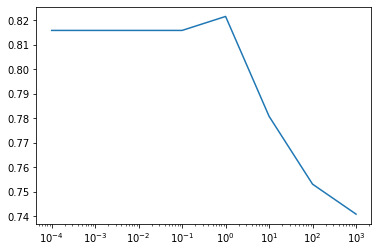

In [74]:
plt.plot(C, test_scores)
plt.xscale('log')
plt.show()